# Heart Attack Data Exploration

In [2]:
#!pip install imbalanced-learn

In [37]:
#!pip install xgboost

In [26]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#from sklearn.linear_model import LogisticRegression
from scipy import stats
#import matplotlib.pyplot as plt
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NearMiss
#from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline



## Loading and Preprocessing Heart Attack Data

In [68]:
# Loading data
file_path = Path("../Resources/heart_attack_prediction_dataset.csv")
df_heart = pd.read_csv(file_path)
df_heart.head()


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [3]:
df_heart.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [42]:
# Define target vector
y = df_heart["Heart Attack Risk"]
y[:10]

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: Heart Attack Risk, dtype: int64

In [43]:
# Define features set
X = df_heart.copy()
# Drop interfering and target columns
X.drop(["Patient ID","Country","Continent","Hemisphere",
        "Smoking", "Diabetes", "Obesity", "Alcohol Consumption", "Previous Heart Problems", "Medication Use",
        "Family History", "Diet", "Sleep Hours Per Day", "Physical Activity Days Per Week", "Heart Attack Risk",
        "Stress Level", "Sex"], axis=1, inplace=True)
X['SystolicBP'] = X['Blood Pressure'].str.split("/").str[0]
X['DiastolicBP'] = X['Blood Pressure'].str.split("/").str[1]
X.drop(["Blood Pressure"], axis=1, inplace=True)
X.head()

,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Sedentary Hours Per Day,Income,BMI,Triglycerides
0,67,208,72,4.168189,6.615001,261404,31.251233,286
1,21,389,98,1.813242,4.963459,285768,27.194973,235
2,21,324,72,2.078353,9.463426,235282,28.176571,587
3,84,383,73,9.828130,7.648981,125640,36.464704,378
4,66,318,93,5.804299,1.514821,160555,21.809144,231


In [9]:
# Define features set
X = df_heart.copy()
# Drop interfering and target columns
X.drop(["Patient ID","Blood Pressure","Blood Pressure","Country","Continent","Hemisphere",
        "Smoking", "Diabetes", "Obesity", "Alcohol Consumption", "Previous Heart Problems", "Medication Use",
        "Family History", "Diet", "Sleep Hours Per Day", "Physical Activity Days Per Week", "Heart Attack Risk",
        "Stress Level", "Sex"], axis=1, inplace=True)
X.head()

,Age,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Obesity,Exercise Hours Per Week,Previous Heart Problems,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides
0,67,208,158/88,72,0,0,0,4.168189,0,9,6.615001,261404,31.251233,286
1,21,389,165/93,98,1,1,1,1.813242,1,1,4.963459,285768,27.194973,235
2,21,324,174/99,72,1,0,0,2.078353,1,9,9.463426,235282,28.176571,587
3,84,383,163/100,73,1,1,0,9.828130,1,9,7.648981,125640,36.464704,378
4,66,318,91/88,93,1,1,1,5.804299,1,6,1.514821,160555,21.809144,231


In [6]:
# Convert float numbers to int to reduce number of unique values
X['Exercise Hours Per Week'] = X['Exercise Hours Per Week'].astype(int)
X['Sedentary Hours Per Day'] = X['Sedentary Hours Per Day'].astype(int)
X['BMI'] = X['BMI'].astype(int)
X.nunique()

Age                          73
Cholesterol                 281
Heart Rate                   71
Exercise Hours Per Week      20
Sedentary Hours Per Day      12
Income                     8615
BMI                          22
Triglycerides               771
SystolicBP                   91
DiastolicBP                  51
dtype: int64

In [7]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Applying NearMiss
#nm1 = NearMiss(version=1)
#X_resampled, y_resampled = nm1.fit_resample(X_train, y_train)

# Applying RandomUnderSampler
#rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
#X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [8]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [10]:
# Fitting Standard Scaler
#X_scaler = scaler.fit(X_resampled)
X_scaler = scaler.fit(X_train)

In [11]:
# Scaling data
#X_train_scaled = X_scaler.transform(X_resampled)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [76]:
#import xgboost as xgb

# Initialize the XGBoost classifier
#model_xgb = xgb.XGBClassifier(objective='binary:logistic', eval_metric="logloss", use_label_encoder=False, random_state=42)

# Fit the model with the training data
#model_xgb.fit(X_train_scaled, y_resampled)

In [15]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500)

In [16]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [17]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [18]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [19]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Confusion matrix Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1101,24
Actual 1,612,16


Confusion matrix Accuracy Score : 0.6371933827723902
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.98      0.78      1125
           1       0.40      0.03      0.05       628

    accuracy                           0.64      1753
   macro avg       0.52      0.50      0.41      1753
weighted avg       0.56      0.64      0.52      1753



## Feature Importance

[(0.12295952573918019, 'Income'), (0.12193859383808935, 'Triglycerides'), (0.11606033436530941, 'Cholesterol'), (0.10791657249203233, 'SystolicBP'), (0.10403216446100214, 'Age'), (0.10232854399311497, 'Heart Rate'), (0.09726440273586266, 'DiastolicBP'), (0.08233235100679187, 'BMI'), (0.07823409111163342, 'Exercise Hours Per Week'), (0.06693342025698365, 'Sedentary Hours Per Day')]


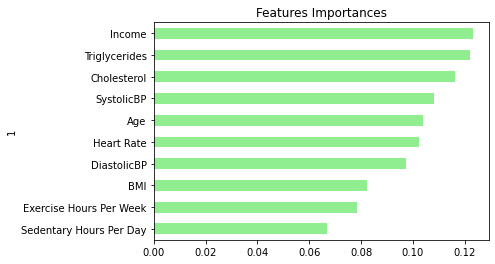

In [22]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

## Deep learning model

In [62]:
# Import dependencies and determine the number of unique values in each column
#import tensorflow as tf
#X.nunique()

In [61]:
"""
# Get the min and max for range
print(X['Age'].min(), X['Age'].max())
print(X['Cholesterol'].min(), X['Cholesterol'].max())
print(X['Heart Rate'].min(), X['Heart Rate'].max())
print(X['Exercise Hours Per Week'].min(), X['Exercise Hours Per Week'].max())
print(X['Sedentary Hours Per Day'].min(), X['Sedentary Hours Per Day'].max())
print(X['Income'].min(), X['Income'].max())
print(X['BMI'].min(), X['BMI'].max())
print(X['Triglycerides'].min(), X['Triglycerides'].max())
"""

"\n# Get the min and max for range\nprint(X['Age'].min(), X['Age'].max())\nprint(X['Cholesterol'].min(), X['Cholesterol'].max())\nprint(X['Heart Rate'].min(), X['Heart Rate'].max())\nprint(X['Exercise Hours Per Week'].min(), X['Exercise Hours Per Week'].max())\nprint(X['Sedentary Hours Per Day'].min(), X['Sedentary Hours Per Day'].max())\nprint(X['Income'].min(), X['Income'].max())\nprint(X['BMI'].min(), X['BMI'].max())\nprint(X['Triglycerides'].min(), X['Triglycerides'].max())\n"

In [59]:
"""
# Bin all columns except for exercise and sedentary hours per week

X['Age'] = pd.qcut(X['Age'], 10, 
                   labels=np.linspace(X['Age'].min(), X['Age'].max(), 
                                      num=10, dtype=np.int64))

X['Cholesterol'] = pd.qcut(X['Cholesterol'], 10, 
                           labels=np.linspace(X['Cholesterol'].min(), X['Cholesterol'].max(), 
                                              num=10, dtype=np.int64))

X['Heart Rate'] = pd.qcut(X['Heart Rate'], 10, 
                           labels=np.linspace(X['Heart Rate'].min(), X['Heart Rate'].max(), 
                                              num=10, dtype=np.int64))

X['Income'] = pd.qcut(X['Income'], 10, 
                           labels=np.linspace(X['Income'].min(), X['Income'].max(), 
                                              num=10, dtype=np.int64))

X['BMI'] = pd.qcut(X['BMI'], 10, 
                           labels=np.linspace(X['BMI'].min(), X['BMI'].max(), 
                                              num=10, dtype=np.int64))

X['Triglycerides'] = pd.qcut(X['Triglycerides'], 10, 
                           labels=np.linspace(X['Triglycerides'].min(), X['Triglycerides'].max(), 
                                              num=10, dtype=np.int64))

X.head()
"""

"\n# Bin all columns except for exercise and sedentary hours per week\n\nX['Age'] = pd.qcut(X['Age'], 10, \n                   labels=np.linspace(X['Age'].min(), X['Age'].max(), \n                                      num=10, dtype=np.int64))\n\nX['Cholesterol'] = pd.qcut(X['Cholesterol'], 10, \n                           labels=np.linspace(X['Cholesterol'].min(), X['Cholesterol'].max(), \n                                              num=10, dtype=np.int64))\n\nX['Heart Rate'] = pd.qcut(X['Heart Rate'], 10, \n                           labels=np.linspace(X['Heart Rate'].min(), X['Heart Rate'].max(), \n                                              num=10, dtype=np.int64))\n\nX['Income'] = pd.qcut(X['Income'], 10, \n                           labels=np.linspace(X['Income'].min(), X['Income'].max(), \n                                              num=10, dtype=np.int64))\n\nX['BMI'] = pd.qcut(X['BMI'], 10, \n                           labels=np.linspace(X['BMI'].min(), X['BMI'].max(), \n

In [57]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3000)
#scaler = StandardScaler()
#X_scaler = scaler.fit(X_train)
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [56]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#nn = tf.keras.models.Sequential()

# First hidden layer
#nn.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))

# Second hidden layer
#nn.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Third hidden layer
#nn.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Output layer
#nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

In [55]:
#nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
#fit_model = nn.fit(X_train_scaled, y_train, epochs=200)

In [53]:
#model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
#print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

## Auto-optimisation

In [48]:
#!pip install keras_tuner

In [49]:
"""
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh', 'sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=8))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model
"""

'\n# Create a method that creates a new Sequential model with hyperparameter options\ndef create_model(hp):\n    nn_model = tf.keras.models.Sequential()\n\n    # Allow kerastuner to decide which activation function to use in hidden layers\n    activation = hp.Choice(\'activation\',[\'relu\',\'tanh\', \'sigmoid\'])\n    \n    # Allow kerastuner to decide number of neurons in first layer\n    nn_model.add(tf.keras.layers.Dense(units=hp.Int(\'first_units\',\n        min_value=1,\n        max_value=30,\n        step=5), activation=activation, input_dim=8))\n\n    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers\n    for i in range(hp.Int(\'num_layers\', 1, 6)):\n        nn_model.add(tf.keras.layers.Dense(units=hp.Int(\'units_\' + str(i),\n            min_value=1,\n            max_value=30,\n            step=5),\n            activation=activation))\n    \n    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))\n\n    # Compile the model\n    n

In [50]:
"""
# Import the kerastuner library
import keras_tuner as kt
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=200,
    hyperband_iterations=2)

# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))
"""

'\n# Import the kerastuner library\nimport keras_tuner as kt\ntuner = kt.Hyperband(\n    create_model,\n    objective="val_accuracy",\n    max_epochs=200,\n    hyperband_iterations=2)\n\n# Run the kerastuner search for best hyperparameters\ntuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))\n'

In [51]:
# Get best model hyperparameters
#best_hyper = tuner.get_best_hyperparameters(1)[0]
#best_hyper.values

In [52]:
# Evaluate best model against full test data
#best_model = tuner.get_best_models(1)[0]
#model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
#print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

## Logistic Regression

In [58]:
"""
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

logistic_regression_model = LogisticRegression(random_state=9)
lr_model = logistic_regression_model.fit(X_train_scaled, y_train)
training_predictions = lr_model.predict(X_train_scaled)
testing_predictions = logistic_regression_model.predict(X_test_scaled)

# Create confusion matrix
training_matrix = confusion_matrix(y_train, training_predictions)
print(training_matrix)
training_report = classification_report(y_train, training_predictions)
print(training_report)
"""

[[4203    0]
 [2369    0]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      4203
           1       0.00      0.00      0.00      2369

    accuracy                           0.64      6572
   macro avg       0.32      0.50      0.39      6572
weighted avg       0.41      0.64      0.50      6572



C:\Users\Oormi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oormi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oormi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
